# Titanic Classification Project

## Fetching the Data

In [1]:
# 3

import os 
from zipfile import ZipFile

def extract_data(name_of_zip="titanic", ROOT='C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML/datasets', extension=".zip", reset_path="C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML"):
    os.chdir("C:/Users/VTSB/Downloads")
    print(os.getcwd())
    with ZipFile(name_of_zip + extension, 'r') as zipObj:
           zipObj.extractall(os.path.join(ROOT, name_of_zip))
    os.chdir(reset_path)
    print(os.getcwd())
        
extract_data()

C:\Users\VTSB\Downloads
C:\Users\VTSB\Desktop\CS Resources\AI Hands-On ML


In [2]:
import pandas as pd

def load_data(ROOT='C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML/datasets', extension=".csv", name_of_zip="titanic", name_of_folder="titanic"):
    csv_path = ROOT + "/" + name_of_folder + "/" + name_of_zip + extension
    print(csv_path)
    return pd.read_csv(csv_path)

train_set = load_data(name_of_zip="train")
test_set_features = load_data(name_of_zip="test")
test_set_labels = load_data(name_of_zip="gender_submission")

C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML/datasets/titanic/train.csv
C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML/datasets/titanic/test.csv
C:/Users/VTSB/Desktop/CS Resources/AI Hands-On ML/datasets/titanic/gender_submission.csv


## Previewing the Data

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


+ SibSp is # of siblings/spouses each person has on board
+ Parch is # of parents/children each person has on board
+ ticket is the Ticket number	
+ fare is the Passenger fare	
+ cabin	is the Cabin number	
+ embarked is the Port of Embarkation
    + C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_set["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train_set["Survived"].value_counts().count()

2

In [9]:
train_set["PassengerId"].value_counts().count()

891

In [10]:
train_set["Name"].value_counts().count()

891

In [11]:
train_set["Sex"].value_counts().count()

2

In [12]:
train_set["Age"].value_counts().sort_values(ascending=False)

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
14.50     1
0.67      1
24.50     1
20.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [13]:
print(train_set["Age"].min())
print(train_set["Age"].max())

0.42
80.0


In [14]:
print(train_set["SibSp"].value_counts().count())
print(train_set["SibSp"].value_counts())

7
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [15]:
print(train_set["Parch"].value_counts().count())
print(train_set["Parch"].value_counts())

7
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [16]:
print(train_set["Ticket"].value_counts().count())
print(train_set["Ticket"].value_counts())

681
CA. 2343            7
347082              7
1601                7
CA 2144             6
3101295             6
                   ..
28134               1
349213              1
349248              1
STON/O2. 3101283    1
14311               1
Name: Ticket, Length: 681, dtype: int64


In [17]:
print(train_set["Fare"].value_counts().count())
print(train_set["Fare"].value_counts())
print(train_set["Cabin"].value_counts().count())
print(train_set["Cabin"].value_counts())
print(train_set["Embarked"].value_counts().count())
print(train_set["Embarked"].value_counts())

248
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
147
B96 B98        4
C23 C25 C27    4
G6             4
D              3
C22 C26        3
              ..
F E69          1
A19            1
C104           1
C50            1
C30            1
Name: Cabin, Length: 147, dtype: int64
3
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [18]:
train_set.shape

(891, 12)

+ ticket and cabin could be problematic
+ null values in Age, Cabin, Embarked

In [19]:
print(test_set_features.shape) 
print(test_set_labels.shape) # this might need some work

(418, 11)
(418, 2)


In [20]:
test_set_features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
test_set_labels

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<AxesSubplot:>

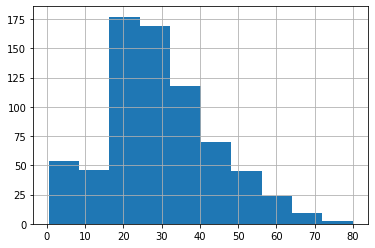

In [22]:
train_set["Age"].hist()

<AxesSubplot:>

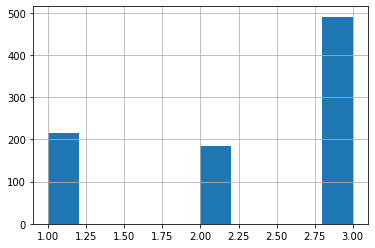

In [23]:
train_set["Pclass"].hist()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

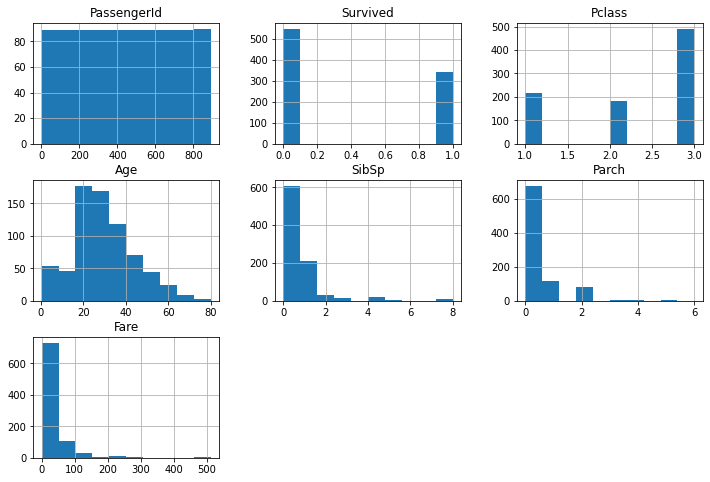

In [24]:
train_set.hist(figsize=(12, 8))

# Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd

## Split Data

In [25]:
# checks if the PassengerIds are not sorted
y = 0
for x in test_set_labels["PassengerId"]:
    if (x > y): print(x)
    else: break

892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
111

In [26]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
test_set_features.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
# making a copy to preserve original state of data

test_set_features_copy = test_set_features.copy()
test_set_features_copy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
test_set_labels.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [30]:
# making a copy to preserve original state of data

test_set_labels_survived = test_set_labels["Survived"].copy()
test_set_labels_survived.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [31]:
# given that the PassengerIds are the same, insert the survived column into the test_set_features_copy 

test_set_features_copy.insert(1, "Survived", test_set_labels_survived) # this is inplace

In [32]:
test_set_copy = test_set_features_copy.copy() # renaming it for readability
test_set_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
data_set = np.concatenate((train_set, test_set_copy), axis=0)
data_set = pd.DataFrame(data_set, columns=train_set.columns)

In [35]:
data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [36]:
sum(data_set[0:891]["Age"] == train_set[0:891]["Age"])

714

In [37]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  1309 non-null   object
 1   Survived     1309 non-null   object
 2   Pclass       1309 non-null   object
 3   Name         1309 non-null   object
 4   Sex          1309 non-null   object
 5   Age          1046 non-null   object
 6   SibSp        1309 non-null   object
 7   Parch        1309 non-null   object
 8   Ticket       1309 non-null   object
 9   Fare         1308 non-null   object
 10  Cabin        295 non-null    object
 11  Embarked     1307 non-null   object
dtypes: object(12)
memory usage: 122.8+ KB


In [38]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
data_set[["PassengerId", "Survived", "Pclass", "SibSp", "Parch"]] = data_set[["PassengerId", "Survived", "Pclass", "SibSp", "Parch"]].astype(np.int64)
data_set[["Age", "Fare"]] = data_set[["Age", "Fare"]].astype(np.float64)
data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [40]:
# function to redo the combine data for stratification/shuffling/splitting

def SSS_preprocessing(training_data, test_data_features, test_data_labels):
    test_data_features_copy = test_data_features.copy()
    test_data_labels_survived = test_data_labels["Survived"].copy()
    test_data_features_copy.insert(1, "Survived", test_data_labels_survived)
    test_data_copy = test_data_features_copy.copy() # readability
    data_set = np.concatenate((training_data, test_set_copy), axis=0)
    return pd.DataFrame(data_set, columns=training_data.columns)

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(random_state=42, n_splits=1, test_size=0.2)

for train_index, test_index in split.split(data_set, data_set["Survived"]):
    strat_train_set = data_set.loc[train_index]
    strat_test_set = data_set.loc[test_index]

In [42]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1021,1022,0,3,"Spinner, Mr. Henry John",male,32.0,0,0,STON/OQ. 369943,8.0500,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
924,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
1189,1190,0,1,"Loring, Mr. Joseph Holland",male,30.0,0,0,113801,45.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
960,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
1132,1133,1,2,"Christy, Mrs. (Alice Frances)",female,45.0,0,2,237789,30.0000,NaN,S


In [43]:
strat_test_set # don't touch!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
950,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,NaN,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
1136,1137,0,1,"Kenyon, Mr. Frederick R",male,41.0,1,0,17464,51.8625,D21,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
1130,1131,1,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.4250,C86,C
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C


## Diving into the Data (EDA)

In [44]:
strat_train_set_EDAcopy = strat_train_set.copy()
strat_train_set_EDAcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 1021 to 108
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1047 non-null   int64  
 1   Survived     1047 non-null   int64  
 2   Pclass       1047 non-null   int64  
 3   Name         1047 non-null   object 
 4   Sex          1047 non-null   object 
 5   Age          843 non-null    float64
 6   SibSp        1047 non-null   int64  
 7   Parch        1047 non-null   int64  
 8   Ticket       1047 non-null   object 
 9   Fare         1047 non-null   float64
 10  Cabin        233 non-null    object 
 11  Embarked     1047 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 106.3+ KB


In [45]:
corr_mtx = strat_train_set_EDAcopy.corr()
corr_mtx["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.242294
Parch          0.100861
SibSp          0.017527
PassengerId    0.002088
Age           -0.060945
Pclass        -0.269344
Name: Survived, dtype: float64

In [46]:
strat_train_set_EDAcopy["Age_cat"] = pd.cut(strat_train_set_EDAcopy["Age"],
                                 bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], include_lowest=True,
                                 labels=["0-10", "10-20", "20-30", "30-40" ,"40-50",
                                         "50-60", "60-70", "70-80"])

In [47]:
strat_train_set_EDAcopy["SibSp_cat"] = pd.cut(strat_train_set_EDAcopy["SibSp"],
                                 bins=[0, 2, 4, 6, 8], include_lowest=True,
                                 labels=["0-2", "2-4", "4-6", "6-8"])

In [48]:
strat_train_set_EDAcopy["Parch_cat"] = pd.cut(strat_train_set_EDAcopy["Parch"],
                                 bins=[0, 2, 4, 6, 8, 10], include_lowest=True,
                                 labels=["0-2", "2-4", "4-6", "6-8", "8-10"])

In [49]:
np.array(strat_train_set_EDAcopy["Age_cat"].value_counts().sort_index())

array([ 66, 130, 299, 167, 106,  50,  19,   6], dtype=int64)

In [50]:
strat_train_set_EDAcopy["Pclass"].value_counts()

3    568
1    253
2    226
Name: Pclass, dtype: int64

In [51]:
strat_train_set_EDAcopy["Sex"].value_counts().sort_index()

female    376
male      671
Name: Sex, dtype: int64

In [52]:
def plot_attb_vs_survival(column_name=None):
    Age_ranges = ["0-10", "10-20", "20-30", "30-40" ,"40-50", "50-60", "60-70", "70-80"]
    SibSp_ranges = ["0-2", "2-4", "4-6", "6-8"]
    Parch_ranges = ["0-2", "2-4", "4-6", "6-8", "8-10"]
    Sex_ranges = ["female", "male"]
    Pclass_ranges = [1, 2, 3]
    Embarked_ranges = ["C", "Q", "S"]; Embarked_ranges_names = ["Cherbourg", "Queenstown", "Southampton"]
    
    Age_range_survived, SibSp_range_survived, Parch_range_survived, Sex_range_survived, Pclass_range_survived, Embarked_range_survived = [], [], [], [], [], []
    if column_name == "Age":
        for x in Age_ranges:
            Age_range_survived.append(len(strat_train_set_EDAcopy[(strat_train_set_EDAcopy["Age_cat"]==x) & (strat_train_set_EDAcopy["Survived"]==1)]))
        plt.bar(Age_ranges, np.array(Age_range_survived)/np.array(strat_train_set_EDAcopy["Age_cat"].value_counts().sort_index()))
        plt.xlabel("Age Ranges")
        plt.ylabel("Number Survived")
    if column_name == "SibSp":
        for x in SibSp_ranges:
            SibSp_range_survived.append(len(strat_train_set_EDAcopy[(strat_train_set_EDAcopy["SibSp_cat"]==x) & (strat_train_set_EDAcopy["Survived"]==1)]))
        plt.bar(SibSp_ranges, np.array(SibSp_range_survived)/np.array(strat_train_set_EDAcopy["SibSp_cat"].value_counts().sort_index()))
        plt.xlabel("SibSp Ranges")
        plt.ylabel("Number Survived")
    if column_name == "Parch":
        for x in Parch_ranges:
            Parch_range_survived.append(len(strat_train_set_EDAcopy[(strat_train_set_EDAcopy["Parch_cat"]==x) & (strat_train_set_EDAcopy["Survived"]==1)]))
        plt.bar(Parch_ranges, np.array(Parch_range_survived)/np.array(strat_train_set_EDAcopy["Parch_cat"].value_counts().sort_index()))
        plt.xlabel("Parch Ranges")
        plt.ylabel("Number Survived")
    if column_name == "Sex":
        for x in Sex_ranges:
            Sex_range_survived.append(len(strat_train_set_EDAcopy[(strat_train_set_EDAcopy[column_name]==x) & (strat_train_set_EDAcopy["Survived"]==1)]))
        plt.bar(Sex_ranges, np.array(Sex_range_survived)/np.array(strat_train_set_EDAcopy["Sex"].value_counts().sort_index()))
        plt.xlabel("Sex")
        plt.ylabel("Number Survived")
    if column_name == "Pclass":
        for x in Pclass_ranges:
            Pclass_range_survived.append(len(strat_train_set_EDAcopy[(strat_train_set_EDAcopy[column_name]==x) & (strat_train_set_EDAcopy["Survived"]==1)]))
        plt.bar(Pclass_ranges, np.array(Pclass_range_survived)/np.array(strat_train_set_EDAcopy["Pclass"].value_counts().sort_index()))
        plt.xlabel("Pclass")
        plt.ylabel("Number Survived")
    if column_name == "Embarked":
        for x in Embarked_ranges:
            Embarked_range_survived.append(len(strat_train_set_EDAcopy[(strat_train_set_EDAcopy[column_name]==x) & (strat_train_set_EDAcopy["Survived"]==1)]))
        plt.bar(Embarked_ranges_names, np.array(Embarked_range_survived)/np.array(strat_train_set_EDAcopy["Embarked"].value_counts().sort_index()))
        plt.xlabel("Embarked")
        plt.ylabel("Number Survived")
        
plt.show()

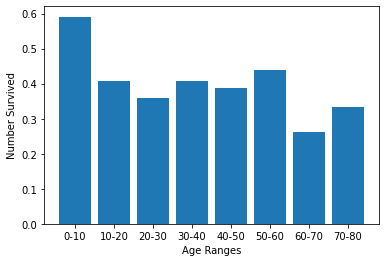

In [53]:
plot_attb_vs_survival("Age") # missing data

C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


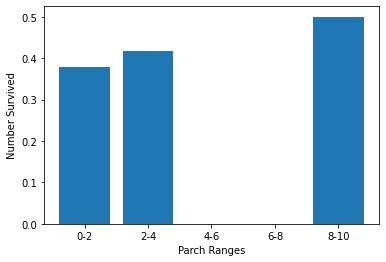

In [54]:
plot_attb_vs_survival("Parch") # most people have 0-2 parents and/or children

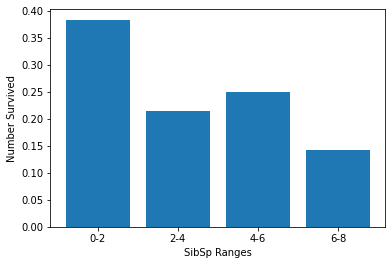

In [55]:
plot_attb_vs_survival("SibSp")

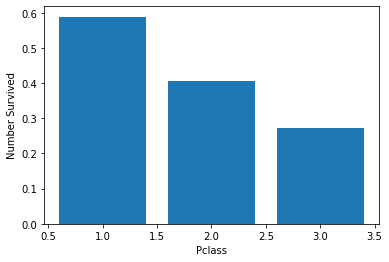

In [56]:
plot_attb_vs_survival("Pclass")

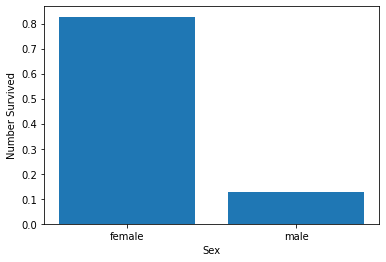

In [57]:
plot_attb_vs_survival("Sex")

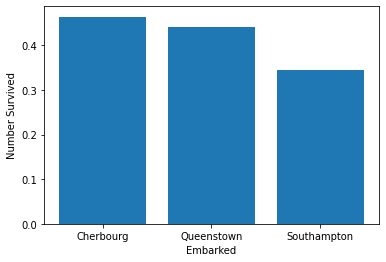

In [58]:
plot_attb_vs_survival("Embarked")

## Data Cleaning

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [60]:
strat_train_set_experimental = strat_train_set.copy()
strat_train_set_experimental_features = strat_train_set_experimental.drop(columns="Survived")

In [61]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 950 to 743
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  262 non-null    int64  
 1   Survived     262 non-null    int64  
 2   Pclass       262 non-null    int64  
 3   Name         262 non-null    object 
 4   Sex          262 non-null    object 
 5   Age          203 non-null    float64
 6   SibSp        262 non-null    int64  
 7   Parch        262 non-null    int64  
 8   Ticket       262 non-null    object 
 9   Fare         261 non-null    float64
 10  Cabin        62 non-null     object 
 11  Embarked     260 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 26.6+ KB


+ ticket and cabin could be problematic => they have too many categoricals
+ null values:
    + Age: SimpleImputer => median
    + Cabin => drop column
    + Embarked => SimpleImputer => most_frequent

### Custom Transformers

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

class SexTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        X_copy["Sex"] = X_copy["Sex"].replace(["male", "female"], [0, 1])
        return X_copy

In [63]:
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_PassengerId=True, drop_name=True, drop_cabin=True):
        self.drop_PassengerId = drop_PassengerId
        self.drop_name = drop_name
        self.drop_cabin = drop_cabin
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        if self.drop_PassengerId:
            X_copy = X_copy.drop(columns="PassengerId")
        if self.drop_name:
            X_copy = X_copy.drop(columns="Name")
        if self.drop_cabin:
            X_copy = X_copy.drop(columns="Cabin")
        return X_copy

In [64]:
st_tfm = SexTransformer()

sex_transformed_exp = st_tfm.fit_transform(strat_train_set_experimental_features)

ct_tfm = CategoricalTransformer()

sex_ct_transformed_exp = ct_tfm.fit_transform(sex_transformed_exp)

sex_ct_transformed_exp

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1021,3,0,32.0,0,0,STON/OQ. 369943,8.0500,S
318,1,1,31.0,0,2,36928,164.8667,S
924,3,1,NaN,1,2,W./C. 6607,23.4500,S
652,3,0,21.0,0,0,8475,8.4333,S
1189,1,0,30.0,0,0,113801,45.5000,S
...,...,...,...,...,...,...,...,...
268,1,1,58.0,0,1,PC 17582,153.4625,S
960,1,1,60.0,1,4,19950,263.0000,S
663,3,0,36.0,0,0,349210,7.4958,S
1132,2,1,45.0,0,2,237789,30.0000,S


### Numeric Pipeline

In [65]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

### Full Pipeline

In [66]:
num_attribs = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Ticket", "Embarked"]

full_pipeline_1 = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_attribs),
    ("1hot_encoded", OneHotEncoder(), cat_attribs)
])

### Full and Modified Pipeline with Classifier

In [67]:
from sklearn.svm import SVC

full_and_modified_pipeline = Pipeline([
    ("bool_tfm", SexTransformer()),
    ("cat_transformer", CategoricalTransformer()),
    ("full_pipeline", full_pipeline_1),
    ("SVM_Classifier", SVC())
])

# skipping the multiple model evaluations and fine tuning

In [68]:
strat_train_set_features = strat_train_set.drop(columns="Survived")
strat_train_set_labels = strat_train_set["Survived"].copy()

In [69]:
full_and_modified_pipeline.fit(strat_train_set_features, strat_train_set_labels)

Pipeline(steps=[('bool_tfm', SexTransformer()),
                ('cat_transformer', CategoricalTransformer()),
                ('full_pipeline',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch', 'Fare']),
                                                 ('1hot_encoded',
                                                  OneHotEncoder(),
                                                  ['Ticket', 'Embarked'])])),
                ('SVM_Classifier', SVC())])

### Classification Model Evaluation

+ cross_val_score used strictly for calculating scores
+ you can use cross_val_predict to also generate scores but cross_val_predict has a larger field of application (i.e. producing ROC/PR curves)


+ cross_val_score scoring options: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [70]:
full_and_modified_pipeline1 = Pipeline([
    ("bool_tfm", SexTransformer()),
    ("cat_transformer", CategoricalTransformer()),
    ("full_pipeline", full_pipeline_1)
])

strat_train_set_features_prepared = full_and_modified_pipeline1.fit_transform(strat_train_set_features)

In [71]:
from sklearn.model_selection import cross_val_predict

SVC_classifier = SVC(probability=True) # true so you can show probabilities
predictions = cross_val_predict(SVC_classifier, strat_train_set_features_prepared, strat_train_set_labels,
                                cv=3)

In [72]:
predictions

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

print("Accuracy:", accuracy_score(strat_train_set_labels, predictions))
print("Precision:", precision_score(strat_train_set_labels, predictions))
print("Recall:", recall_score(strat_train_set_labels, predictions))
print("F1: ", f1_score(strat_train_set_labels, predictions))

Accuracy: 0.8691499522445081
Precision: 0.8467741935483871
Recall: 0.7974683544303798
F1:  0.8213820078226858


+ remember that these 4 performance measures take labels, predictions
+ PR/ROC/ROC_AUC take labels, scores (i.e. decision_function or predict_proba)

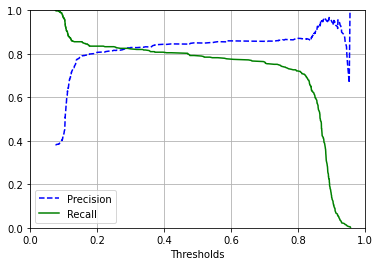

In [74]:
scores = cross_val_predict(SVC_classifier, strat_train_set_features_prepared, strat_train_set_labels,
                                cv=3, method="predict_proba")

precisions, recalls, thresholds = precision_recall_curve(strat_train_set_labels, scores[:, 1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Thresholds")
    plt.grid(True)
    plt.axis([0, 1, 0, 1]) 
    plt.legend()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [75]:
from sklearn.base import clone

SVC_classifier_clone = clone(SVC_classifier)
SVC_classifier_clone.fit(strat_train_set_features_prepared, strat_train_set_labels)
SVC_classifier_clone.classes_

# [0 is dead, 1 is survived]

array([0, 1], dtype=int64)

In [76]:
scores

array([[0.89239891, 0.10760109],
       [0.17469766, 0.82530234],
       [0.46289063, 0.53710937],
       ...,
       [0.88919165, 0.11080835],
       [0.17572894, 0.82427106],
       [0.88791531, 0.11208469]])

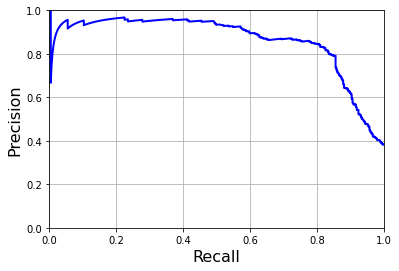

In [77]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
plot_precision_vs_recall(precisions, recalls)

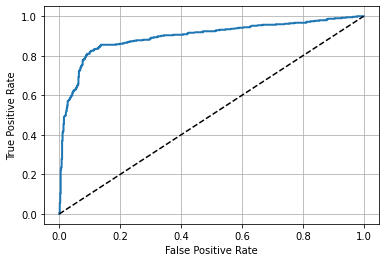

In [78]:
fpr, tpr, thresholds = roc_curve(strat_train_set_labels, scores[:, 1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--") # dashed diagonal
    plt.grid(True)
    plt.axis("on")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr, tpr)

In [79]:
roc_auc_score(strat_train_set_labels, scores[:, 1])

0.8965481090316068

### Error Analysis

In [80]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(strat_train_set_labels, predictions, labels=[0, 1])
cmtx = pd.DataFrame(
    conf_mx, 
    index=['actual: 0', 'actual: 1'], 
    columns=['pred: 0', 'pred: 1']
)

cmtx

,pred: 0,pred: 1
actual: 0,595,57
actual: 1,80,315


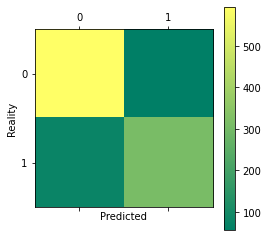

In [81]:
plt.matshow(cmtx, cmap=plt.cm.summer)
plt.xlabel("Predicted")
plt.ylabel("Reality")
plt.colorbar()
plt.grid(False)
plt.show()

In [82]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
normalized_conf_mx = conf_mx / row_sums
np.fill_diagonal(normalized_conf_mx, 0)

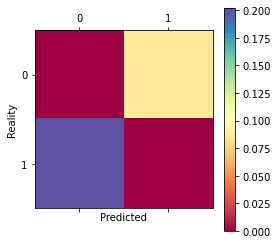

In [83]:
plt.matshow(normalized_conf_mx, cmap=plt.cm.Spectral)
plt.xlabel("Predicted")
plt.ylabel("Reality")
plt.colorbar()
plt.grid(False)
plt.show()

### Evaluate on Test Set

In [84]:
cat_pipeline = Pipeline([
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("1hot_encoded", OneHotEncoder())
])

full_pipeline_1 = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_attribs),
    ("cat_pipeline", cat_pipeline, cat_attribs)
])

full_and_modified_pipeline2 = Pipeline([
    ("bool_tfm", SexTransformer()),
    ("cat_transformer", CategoricalTransformer()),
    ("full_pipeline", full_pipeline_1)
])

In [85]:
from sklearn.model_selection import cross_val_score

strat_test_set_features = strat_test_set.drop(columns="Survived")
strat_test_set_labels = strat_test_set["Survived"].copy()

strat_test_set_features_prepared = full_and_modified_pipeline2.fit_transform(strat_test_set_features)

accuracy = cross_val_score(SVC_classifier, strat_test_set_features_prepared, strat_test_set_labels, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


In [86]:
accuracy.mean()

0.8320754716981131

+ **2 Nice Additional Transformer Features**

In [87]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]